In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df=pd.read_csv('train_F3fUq2S.csv')

In [31]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['times_of_day']=le.fit_transform(df['times_of_day'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   int32  
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [5]:
df.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

<AxesSubplot:>

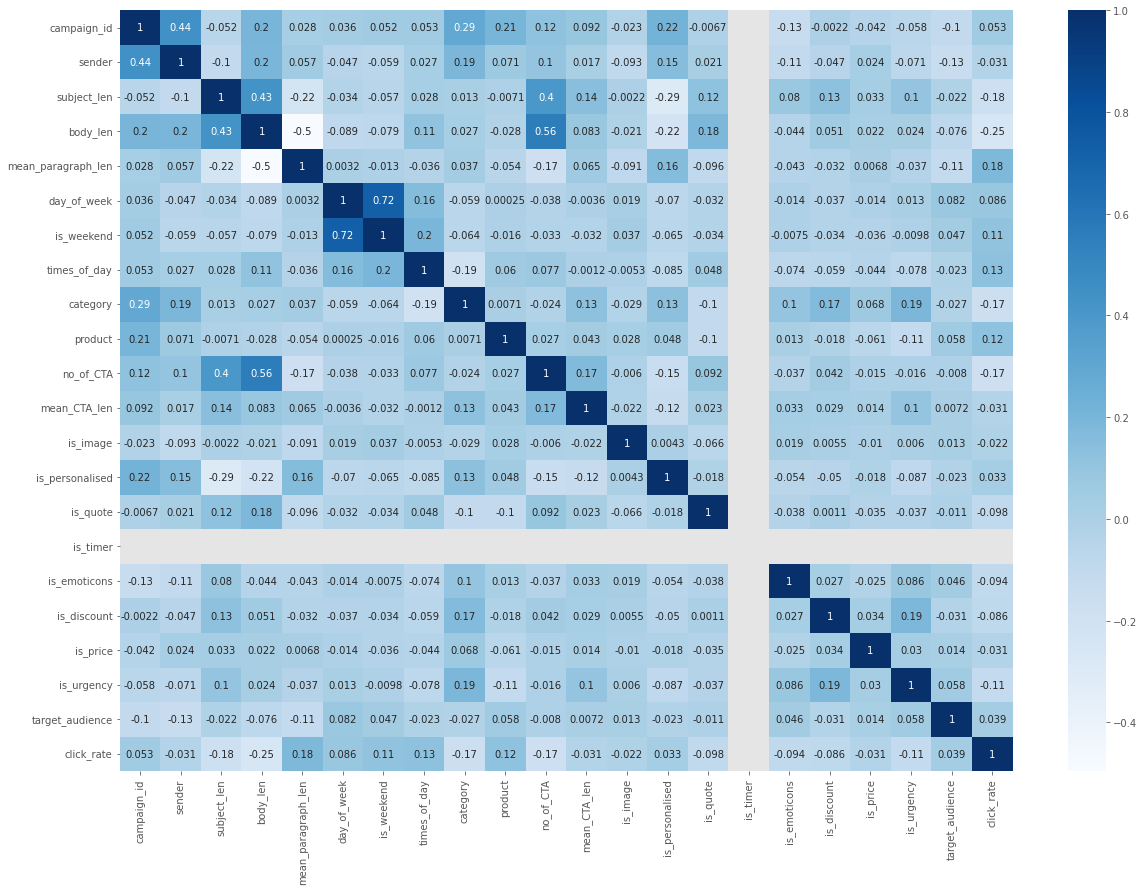

In [6]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [23]:
X=df.drop(['click_rate'],axis=1)
y=df['click_rate']*1000000

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [27]:
alg=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),KNeighborsRegressor()]

names=['linearregression','ridgeregression','lassoregression','decisiontreeregressor','randomforestregressor','xgboostregressor','kneighborsregressor']

In [28]:
l1=[]
for i in alg:
    model=i
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    R2_score=r2_score(y_test,y_hat)
    l1.append(R2_score)

In [29]:
eval=pd.DataFrame({'Model':names,
                  'R2_score':l1})

In [30]:
eval

,Model,R2_score
0,linearregression,0.153320
1,ridgeregression,0.153386
2,lassoregression,0.086917
3,decisiontreeregressor,-0.792095
4,randomforestregressor,0.394709
5,xgboostregressor,0.457107
6,kneighborsregressor,0.213498


In [56]:
train=pd.read_csv('train_F3fUq2S.csv')
test=pd.read_csv('test_Bk2wfZ3.csv')

In [57]:
train['times_of_day']=le.fit_transform(train['times_of_day'])
test['times_of_day']=le.fit_transform(test['times_of_day'])

In [58]:
X=train.drop('click_rate',axis=1)
y=train.click_rate

In [60]:
rr=RandomForestRegressor()
rr.fit(X,y)

RandomForestRegressor()

In [61]:
y_hat3=rr.predict(test)

In [62]:
submission=pd.read_csv('sample_submission_LJ2N3ZQ.csv')


In [63]:
submission['click_rate']=y_hat3

In [64]:
submission.to_csv('my_submission3.csv', index=False)